# Week 2

understanding this is key, so a little background should make things a little clearer

# **How Diffusion Models Create New Data from Noise**

The diffusion model works by starting with **real data**, adding noise to it, and then learning how to reverse that noise to get back to the original data. However, creating something **new**—such as generating images from text—happens during the **generation phase**, after the model has been trained.

---

## **1. Training Phase (Learning How to Denoise)**

- The **training process** for a diffusion model involves teaching it how to **reverse the noise** it has added to real data.
  
- During training, the model is fed real data (e.g., images), and at each timestep, noise is gradually added to it (forward process). The model learns how to reverse this process (the reverse diffusion) so it can recover the clean data (original image) from noisy versions.

- The model **does not create new data** during training. It simply learns how to **denoise** noisy data by learning the relationship between noisy data and clean data.

---

## **2. Generation Phase (Creating New Data)**

Once trained, the model can **generate new data** by starting from **pure noise** and applying the learned denoising process step by step to turn that noise into meaningful output (e.g., an image, text, etc.).

### **From Text to Image (e.g., Text-to-Image Diffusion Models)**

1. **Start with Random Noise**: The model begins with a **random noise image**. This image is essentially a collection of random pixels with no meaningful structure or pattern.

2. **Input Text**: In a **text-to-image model**, the model receives a text description (e.g., "A sunset over the mountains"). This text description is used to guide the generation process.

3. **Conditioning the Model on Text**: The model is **conditioned on the text** using a mechanism like **CLIP** (Contrastive Language-Image Pre-training), or a similar architecture, to understand the semantic meaning of the text. This helps the model know what type of image it should generate from the noise, based on the input description.

4. **Gradual Denoising**: The model now **denoises the random image step-by-step**, guided by the textual description. At each step, the model makes the image less noisy and more structured, eventually generating an image that matches the description in the text.

   - At each timestep of the reverse process, the model **refines** the image by removing noise and introducing more structure according to what the text describes (e.g., "sunset," "mountains," "sky").

5. **End Result**: After several steps of denoising, the random noise transforms into a **coherent image** that matches the text prompt. This is how the model creates a new image that it has never seen before!

---

## **Why Does This Work?**
The power of diffusion models comes from their ability to **learn the underlying structure of data** (e.g., images, audio, etc.) during training. During the reverse diffusion process, the model can apply that learned structure to **generate completely new data** from random noise, guided by the text or other inputs.

In text-to-image generation:
- The **conditioning mechanism** (like CLIP) ensures that the generated image aligns with the text description.
- The **denoising process** ensures that the random noise is transformed into a **coherent and meaningful output**.

This is how diffusion models are able to generate **new images** that have never been seen before based on an input prompt (text, in this case).

---

## **Summary of the Process:**
1. **Training**: The model learns to reverse the noise from real data.
2. **Generation**: The model starts with noise and uses learned denoising steps, guided by input (like text), to generate **entirely new** data.

Thus, the model **creates something new** because during training, it has learned how to **extract meaningful patterns** from noisy data and use that knowledge to generate new examples from noise.

---

# **Marginal Probability Path and Its Relation to Conditional Probability Path**

## **1. From Conditional to Marginal Probability**
The **conditional probability path** expresses how one event depends on another:

$$
P(A_n | A_{n-1}, A_{n-2}, \dots, A_1) = \frac{P(A_n, A_{n-1}, \dots, A_1)}{P(A_{n-1}, \dots, A_1)}
$$

From this, we can express the **joint probability** using the chain rule:

$$
P(A_1, A_2, \dots, A_n) = P(A_1) P(A_2 | A_1) P(A_3 | A_1, A_2) \dots P(A_n | A_1, A_2, \dots, A_{n-1}).
$$

To obtain the **marginal probability** of a specific variable (say \( A_n \)), we sum (or integrate) over all other variables:

$$
P(A_n) = \sum_{A_1, A_2, \dots, A_{n-1}} P(A_n, A_{n-1}, \dots, A_1).
$$

or in continuous form:

$$
P(A_n) = \int P(A_n, A_{n-1}, \dots, A_1) \, dA_1 \, dA_2 \, \dots \, dA_{n-1}.
$$

---

## **2. Why Does This Matter?**
- **Marginalization removes dependencies** and gives us the probability of a variable without needing to know the others.
- **In Bayesian inference**, marginal probabilities (evidence) allow us to normalize posterior distributions:
  
  $$
  P(A | B) = \frac{P(B | A) P(A)}{P(B)}
  $$

  where \( P(B) \) is found by marginalizing over all possible values of \( A \).

- **In Markov Models**, marginal probability paths give the probability of being in a certain state at a given time.
- **In diffusion models**, marginalizing over noise variables provides a transition from Gaussian noise back to the data distribution.

---

## **3. Intuition: How Conditional Leads to Marginal**
1. **Start with conditional probabilities (dependencies between variables).**
2. **Expand them using the chain rule.**
3. **Integrate or sum out unwanted variables to get marginal probabilities.**

This progression is fundamental in probabilistic AI models.

---

# **Gaussian Probability Path and Its Importance**

## **1. What is the Gaussian Probability Path?**  

A **Gaussian probability path** describes a **sequence of probability distributions** where each step follows a Gaussian distribution. This is common in **stochastic processes, diffusion models, and AI applications**.

If we model a random variable $X_t$ evolving over time, and at each step its probability distribution remains Gaussian, we define its probability path as:

$$
P(X_t) = \mathcal{N}(\mu_t, \sigma_t^2)
$$

where:
- $\mu_t$ is the mean (center of the distribution).
- $\sigma_t^2$ is the variance (spread of the distribution).
- $t$ represents a step in time.

This means that at **each point in time, the distribution of $X_t$ is Gaussian**, but its parameters $(\mu_t, \sigma_t)$ may change over time.

---

## **2. How is it Formulated?**
A common way to describe the evolution of a **Gaussian probability path** is through **stochastic differential equations (SDEs)**:

$$
dX_t = \mu_t dt + \sigma_t dW_t
$$

where:
- $dX_t$ is the infinitesimal change in $X_t$.
- $\mu_t$ is the drift term (mean shift).
- $\sigma_t$ is the diffusion term (variance change).
- $dW_t$ is a **Wiener process** (random noise).

This equation describes **Brownian motion with drift**, meaning $X_t$ follows a Gaussian distribution that shifts and spreads over time.

---

## **3. Why is the Gaussian Probability Path Important?**
### **(a) Diffusion Models in AI**
- **Diffusion probabilistic models** (e.g., Denoising Diffusion Probabilistic Models, DDPMs) use Gaussian probability paths to gradually **add noise to data** and then **reverse the process** to generate realistic samples.
- Example: Image generation in **Stable Diffusion**.

### **(b) Bayesian Filtering (Kalman Filter)**
- **Kalman filters** use Gaussian probability paths to track systems with uncertainty.
- Example: **Predicting the location of an object over time**.

### **(c) Stochastic Processes in Finance**
- **Stock price modeling** (e.g., Black-Scholes equation) assumes **Gaussian random walks** for price movements.

### **(d) Interpolation and Noise Modeling**
- Gaussian probability paths **smoothly interpolate** between data points and approximate noise distributions.

---

## **4. Summary**
| Concept | Explanation |
|---------|------------|
| **Definition** | A path where a system's probability distribution remains Gaussian at each step. |
| **Equation** | $P(X_t) = \mathcal{N}(\mu_t, \sigma_t^2)$, evolving via $dX_t = \mu_t dt + \sigma_t dW_t$. |
| **Importance** | Used in AI (diffusion models), Bayesian filtering (Kalman), finance (Black-Scholes), and stochastic processes. |
| **Key Idea** | Describes how a system evolves probabilistically while maintaining a Gaussian shape. |

---

# **How $ \alpha_t $ and $ \beta_t $ Work in Denoising and Noising**

In **diffusion models**, $ \alpha_t $ and $ \beta_t $ are key components of the **forward** and **reverse diffusion processes**. These functions help control the process of **adding noise** to the data and then **removing it** during training, enabling the model to learn how to recover data from noisy versions.

---

## **1. Forward Process (Adding Noise)**
- During the **forward diffusion** process, noise is gradually added to the data.  
- $ \alpha_t $ defines how much of the original signal remains at each timestep, and $ \beta_t $ controls how much noise is added at that timestep.  
- At the start ($ t = 0 $), there is no noise, and at the end ($ t = 1 $), the data is almost pure noise. This process allows the model to learn how the data transitions from a clean signal to noise over time.

---

## **2. Reverse Process (Removing Noise)**
- In the **reverse diffusion** process, the model learns how to denoise, or reverse the added noise, at each timestep.  
- The goal is for the model to effectively "learn" how to reverse the noise by using the learned noise schedule $ \alpha_t $ and $ \beta_t $, and thus recover the original data from the noisy versions.  
- This reverse process requires the model to predict the clean data based on the noisy data at each timestep, and it's **learned during training** by minimizing the difference between the predicted clean data and the original data.

---

## **3. Training with $ \alpha_t $ and $ \beta_t $**
- Through **training** with noisy data and the noise scheduling functions, the model learns to predict the clean data at each timestep of the reverse process.
- Once trained, the model can **generate new data** (e.g., images, text, etc.) by starting from noise and using the learned reverse process to denoise step by step. This allows the model to **generate data from scratch**, guided by the noise schedule.

---

## **Key Takeaways:**
- $ \alpha_t $ and $ \beta_t $ allow the model to **learn the process of adding and removing noise** effectively.
- Once the model has learned the forward and reverse processes, it can **generate new data** (e.g., creating new images or data points) by using the reverse process starting from noise.
- This makes the model capable of **training on noisy data** and learning how to recover and generate clean data, which is especially powerful for tasks like **image generation**, **data denoising**, and other generative tasks.

So, in short, these functions help the model learn how to **denoise and add noise** in a controlled manner, and in the future, the model can use this learned knowledge to train on new noisy data and even generate entirely new data from noise.


# **Why Are $ \alpha_t $ and $ \beta_t $ Used as Noise Schedulers?**

In **diffusion models** and **probabilistic paths**, $ \alpha_t $ and $ \beta_t $ are used as **noise scheduling functions** that control how noise is gradually added and removed during training and inference. These functions must be **continuously differentiable, monotonic**, and satisfy boundary conditions:

$$
\alpha_0 = \beta_1 = 0, \quad \alpha_1 = \beta_0 = 1
$$

---

## **1. What Are $ \alpha_t $ and $ \beta_t $?**  
- **$ \alpha_t $ (Signal Retention Factor)**  
  - Determines **how much of the original signal remains** at time $ t $.  
  - Starts from 1 (clean data) and gradually decreases to 0 (pure noise).  

- **$ \beta_t $ (Noise Schedule Factor)**  
  - Controls **how much noise is added** at time $ t $.  
  - Starts from 0 (no noise) and increases to 1 (full noise).  

Mathematically, these functions define a smooth transition between the clean data and a Gaussian noise distribution.

---

## **2. Why Must $ \alpha_t $ and $ \beta_t $ Be Monotonic and Differentiable?**
### **(a) Ensures a Smooth Noise Transition**  
- **Monotonicity** ($ \alpha_t $ decreasing, $ \beta_t $ increasing) guarantees that we smoothly **add noise** during the forward diffusion process and **remove noise** in the reverse process.  
- Without monotonicity, we could accidentally **reintroduce the signal too early** or **add noise inconsistently**.

### **(b) Ensures a Well-Defined Probability Path**  
- A **continuously differentiable** function allows the diffusion process to be solved using **stochastic differential equations (SDEs)** and **ODEs**.
- This ensures a **smooth interpolation** between data points when denoising.

---

## **3. How Are $ \alpha_t $ and $ \beta_t $ Defined?**
A common choice is using a **logarithmic or polynomial noise schedule**, such as:

$$
\alpha_t = \cos^2 \left( \frac{\pi}{2} t \right), \quad \beta_t = 1 - \alpha_t
$$

or linearly:

$$
\beta_t = \beta_{\text{min}} + (\beta_{\text{max}} - \beta_{\text{min}}) t
$$

where $ \beta_{\text{min}} $ and $ \beta_{\text{max}} $ define the noise intensity range.

These functions **ensure a gradual and smooth transition** from clean data to pure noise.

---

## **4. Summary Table**
| Property | $ \alpha_t $ (Signal) | $ \beta_t $ (Noise) |
|----------|------------------|------------------|
| **Definition** | Controls **how much signal remains** at time $ t $ | Controls **how much noise is added** at time $ t $ |
| **Behavior** | Starts at 1, decreases to 0 | Starts at 0, increases to 1 |
| **Monotonicity** | Always **decreasing** | Always **increasing** |
| **Differentiability** | **Continuously differentiable** to ensure smooth evolution | Same as $ \alpha_t $ |
| **Why Important?** | Prevents signal from disappearing too quickly | Prevents noise from being added too aggressively |

---

This is why **$ \alpha_t $ and $ \beta_t $ are key noise schedulers** in diffusion models. They ensure a **controlled, smooth** transition between **clean data** and **Gaussian noise**, making the reverse process **learnable**.

---

# Difference Between Flow Matching Loss and Conditional Matching Loss
Flow Matching Loss

This is used in continuous normalizing flows (CNFs) or diffusion models, where we aim to match the probability flow of data across timesteps.
The loss ensures that the velocity field of the model (how data transforms over time) is close to the true velocity of data under a given distribution shift.

Conditional Matching Loss

This is an extension where the loss depends on additional conditions (e.g., class labels, external factors).
Instead of just matching flows blindly, the model is trained to match flows given a condition (e.g., denoising an image given a blurry input).

---

# Flow Matching Loss vs. Conditional Matching Loss

## 1️⃣ Flow Matching Loss Example: Moving a Distribution
Imagine you have **data points that follow a Gaussian distribution** (mean = 0, variance = 1), and you want to learn how these points move over time.

### Step 1: Sample Data Points
Let's say we have three sample points at an initial time step:

$$
x_1 = -1.5, \quad x_2 = 0.3, \quad x_3 = 2.0
$$

### Step 2: Compute True Velocity
In flow matching, we model how each point **should move** over time based on the probability density function.  
For a Gaussian, the true velocity is simply the negative of the point value:

$$
v_{\text{true}}(x) = -x
$$

So, for our points:

$$
v_{\text{true}}(-1.5) = 1.5, \quad v_{\text{true}}(0.3) = -0.3, \quad v_{\text{true}}(2.0) = -2.0
$$

### Step 3: Model’s Predicted Velocity
Let's say our model predicts these velocities instead:

$$
v_{\text{pred}}(-1.5) = 1.2, \quad v_{\text{pred}}(0.3) = -0.5, \quad v_{\text{pred}}(2.0) = -1.8
$$

### Step 4: Compute Flow Matching Loss
The loss is the squared difference between true and predicted velocities:

$$
\text{Loss} = \frac{1}{3} \left( (1.5 - 1.2)^2 + (-0.3 + 0.5)^2 + (-2.0 + 1.8)^2 \right)
$$

$$
= \frac{1}{3} \left( 0.09 + 0.04 + 0.04 \right) = \frac{0.17}{3} = 0.0567
$$

👉 This loss tells the model how far its velocity predictions are from the correct flow.

---

## 2️⃣ Conditional Matching Loss Example: Denoising an Image
Imagine you are trying to remove noise from grayscale image pixels.

### Step 1: Sample Noisy Data
You have a noisy pixel value (conditioned input):

$$
x_{\text{noisy}} = 120
$$

And you know the true clean pixel should be:

$$
x_{\text{clean}} = 100
$$

### Step 2: Model’s Predicted Clean Pixel
Your denoising model predicts:

$$
x_{\text{pred}} = 110
$$

### Step 3: Compute Conditional Matching Loss
The loss is simply the squared difference:

$$
\text{Loss} = (100 - 110)^2 = 100
$$

👉 The model learns to minimize this error, meaning it should predict cleaner values given noisy inputs.

---

## 🔑 Key Difference

| Loss Type                | What’s Matched?             | Example                              |
|--------------------------|----------------------------|--------------------------------------|
| **Flow Matching Loss**   | Velocities of data movement | Transforming noise into a Gaussian  |
| **Conditional Matching Loss** | Data given a condition  | Denoising an image given a noisy input |

---

### **What is Score Matching and Why is it Important?**

**Score Matching** is a method used to estimate the gradient of the log-likelihood of a probability distribution, also known as the "score function." The score function provides the direction in which the likelihood of data is most sensitive to changes in the data. Estimating the score is crucial in machine learning and statistics, as it helps in understanding the data distribution and is used in generative models, such as in training energy-based models (EBMs).

In Score Matching, the goal is to minimize the difference between the **true score function** and the **model's predicted score function**. This is done by training a model to match the gradient of the log-likelihood of the true distribution.

The **Score Matching** objective is:

$$
\mathcal{L}_{SM} = \mathbb{E}_{p(x)} \left[ \| \nabla_x \log p(x) - s_{\theta}(x) \|^2 \right]
$$

where:
- $p(x)$ is the true data distribution.
- $s_{\theta}(x)$ is the learned score function.
- $\nabla_x \log p(x)$ is the true gradient of the log-likelihood.

By minimizing this loss, the model learns to approximate the true score function, which is important for tasks like generative modeling and density estimation.

### **Why is Score Matching Important?**

Score matching is important because:
1. **Gradient Estimation**: It provides a way to estimate the gradient of the log-likelihood without needing to explicitly compute the likelihood, which can be difficult in high-dimensional spaces.
2. **Generative Modeling**: It is crucial in training energy-based models, where the goal is to generate data samples from a probability distribution without needing to normalize the distribution.
3. **Improves Data Understanding**: By learning the score function, the model gains insight into the structure of the data distribution.

### **Example of Score Matching with Numbers**

Let’s consider a simple univariate Gaussian distribution with a known true score function. Suppose the data is drawn from a normal distribution $N(0, 1)$ with a mean of 0 and variance of 1. 

#### **True Distribution**

For a univariate Gaussian distribution, the log-likelihood is:

$$
\log p(x) = -\frac{1}{2} \log(2 \pi) - \frac{1}{2} x^2
$$

The true score function, which is the gradient of the log-likelihood, is:

$$
\nabla_x \log p(x) = -x
$$

This is the true score function for $p(x) \sim N(0, 1)$.

#### **Model’s Score Function (Simplified Example)**

Now, let’s assume our model predicts the score function as:

$$
s_{\theta}(x) = -\theta x
$$

where $\theta$ is a parameter that the model learns.

#### **Objective**

The objective of score matching is to minimize the following loss:

$$
\mathcal{L}_{SM} = \mathbb{E}_{p(x)} \left[ \| \nabla_x \log p(x) - s_{\theta}(x) \|^2 \right]
$$

In our case, the true score is $\nabla_x \log p(x) = -x$, and the predicted score is $s_{\theta}(x) = -\theta x$. So, the loss function becomes:

$$
\mathcal{L}_{SM} = \mathbb{E}_{p(x)} \left[ \| x(1 - \theta) \|^2 \right]
$$

This simplifies to:

$$
\mathcal{L}_{SM} = (1 - \theta)^2
$$

#### **Minimizing the Loss**

To minimize this loss, we set the derivative with respect to $\theta$ equal to zero:

$$
\frac{d}{d\theta} \mathcal{L}_{SM} = 2(1 - \theta)(-1) = 0
$$

This gives us $\theta = 1$.

Therefore, the optimal score function is obtained when $\theta = 1$, which matches the true score function $\nabla_x \log p(x) = -x$.

### **Summary**
- **Score Matching** is a method for estimating the gradient of the log-likelihood (the score function) by minimizing the difference between the model’s predicted score and the true score.
- It is important for generative modeling, density estimation, and when the likelihood is hard to compute directly.
- The **loss function** used in score matching minimizes the difference between the true score function and the predicted score function, helping the model learn the underlying data distribution.

---

### **Difference Between Score Matching and Denoising Score Matching for Gaussian Probability Paths**

Score Matching (SM) is a technique used to learn the score function (the gradient of the log-likelihood) of an unknown probability distribution. 

The **Score Matching** loss is defined as:

$$
\mathcal{L}_{SM} = \mathbb{E}_{p(x)}\left[ \|\nabla_x \log p(x) - s_{\theta}(x)\|^2 \right]
$$

where:
- \( p(x) \) is the true distribution of data.
- \( s_{\theta}(x) \) is the learned score function, typically modeled using a neural network.
- \( \nabla_x \log p(x) \) is the true gradient of the log-likelihood.

**Denoising Score Matching (DSM)** is a variant of score matching where we deal with noisy data and the goal is to predict the clean data given noisy observations. This approach is more practical in real-world scenarios where the true data distribution is not easily accessible.

The main difference lies in the **forward process**:

- **Score Matching** involves directly comparing the score function of the data distribution.
- **Denoising Score Matching** adds noise to the data and learns to denoise it by approximating the score of a noisy data distribution.

In DSM, the model learns the score for the noisy data distribution \( p_{\text{noisy}}(x_t) \), which is generated by adding Gaussian noise to clean data. For each time \( t \), a noisy version \( x_t \) of the clean data \( x_0 \) is created.

---

### **How Denoising Score Matching (DSM) Leads to Diffusion Models**

Denoising Score Matching (DSM) is a crucial step in the development of **score-based generative models**, including **diffusion models** (used in DALL·E, Stable Diffusion, etc.). Let's break it down step by step.

---

#### **1️⃣ Step 1: Why Not Model \( p(x) \) Directly?**
The ultimate goal of generative modeling is to **sample from a complex distribution** \( p(x) \).  
However, directly modeling \( p(x) \) is hard because:
- The probability density function (PDF) may be unknown or difficult to normalize.
- Computing the exact likelihood requires intractable integrals.

Instead of learning \( p(x) \) explicitly, **we learn how \( p(x) \) changes**, which is given by the **score function**:

$$
\nabla_x \log p(x)
$$

This tells us the direction in which the density is increasing—just like a gradient in optimization!

---

#### **2️⃣ Step 2: Approximate Score Matching with DSM**
Instead of estimating \( \nabla_x \log p(x) \) directly, **DSM estimates the score of a noisy version of \( x \)** by adding Gaussian noise:

$$
x_t = x + \sigma_t \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)
$$

where:
- \( x_t \) is the noisy version of \( x \).
- \( \sigma_t \) is the noise level at time \( t \).
- \( \epsilon \) is the Gaussian noise.

The model learns to predict the clean data \( x \) given \( x_t \), which indirectly learns:

$$
\nabla_x \log p_{\text{noisy}}(x_t)
$$

which **approximates the true score function** \( \nabla_x \log p(x) \).

🔹 **Why is this helpful?**  
- Learning to remove noise **trains the model to follow the gradient of \( p(x) \) even when noise is present**.
- This lets us **reverse the process of noise addition**, which is exactly what diffusion models do!

---

#### **3️⃣ Step 3: Connecting DSM to Diffusion Models**
Now, instead of just adding noise **once**, diffusion models **slowly add noise over many time steps** \( t \).  
This creates a **probabilistic path** from real data to pure Gaussian noise:

$$
x_0 \to x_1 \to x_2 \to \dots \to x_T \sim \mathcal{N}(0, I)
$$

where:
- \( x_0 \) is real data.
- \( x_T \) is pure Gaussian noise.
- The process follows a **Markov Chain** where each step adds a tiny bit of noise.

Since we learn the **score function at each noise level**, we can run this process **backward** to **generate new samples**!

🔹 **Reverse Process (Sampling)**
Once the model is trained to predict scores at different noise levels, we can start from **pure Gaussian noise** and use the estimated scores to gradually "denoise" it, step by step:

$$
x_T \to x_{T-1} \to \dots \to x_1 \to x_0
$$

Eventually, this generates new samples from \( p(x) \), just like real data!

---

#### **4️⃣ Step 4: Key Takeaways**
✅ **Score matching learns gradients of probability distributions instead of densities.**  
✅ **DSM makes score matching practical by learning to remove Gaussian noise.**  
✅ **Diffusion models extend DSM by applying noise in a step-by-step process.**  
✅ **Sampling is done by reversing the learned noise process, generating high-quality data.**  

This is the foundation behind state-of-the-art **image, audio, and text generation models**! 🚀  

---

### **💡 Would You Like a Concrete Example with Numbers?**
I can walk through an example where we **add noise, train a model to predict scores, and reverse the process** step by step! Let me know. 😃

---

### **Concrete Example: Denoising Score Matching (DSM) and Diffusion Models**

Let's walk through a simplified example using numbers to better understand **Denoising Score Matching** and how it leads to **Diffusion Models**. We'll break it down into smaller steps.

---

### **Step 1: Setup the Clean Data Distribution (Start with 1D Gaussian)**
We begin with a simple 1D Gaussian distribution:

$$
x \sim \mathcal{N}(0, 1)
$$

This means the clean data $x$ is drawn from a normal distribution with mean 0 and variance 1. So, for example:

$$
x_0 = 1.5
$$

Now, let's add noise to $x_0$.

---

### **Step 2: Add Noise to $x_0$**
For DSM, we add Gaussian noise at each step. Let’s assume we are at **time $t = 1$**, and we add noise with variance $\sigma_1^2 = 0.2^2$.

The noisy version of $x_0$ is:

$$
x_1 = x_0 + \epsilon_1, \quad \epsilon_1 \sim \mathcal{N}(0, 0.2^2)
$$

For example, we could get:

$$
x_1 = 1.5 + 0.3 = 1.8
$$

Now, $x_1$ is noisy.

---

### **Step 3: Train a Model to Denoise**
Now, let’s assume we have a model $s_{\theta}(x_1)$ that learns to predict the clean $x_0$ given $x_1$. The idea is that the model learns the **score function** (gradient of log-likelihood) by minimizing the difference between the predicted score and the true score.

The true score function at $x_1$ is the gradient of the log-density of the noisy distribution $p_{\text{noisy}}(x_1)$, which is:

$$
\nabla_x \log p_{\text{noisy}}(x_1) = \frac{x_0 - x_1}{\sigma_1^2}
$$

Using our numbers:

$$
\nabla_x \log p_{\text{noisy}}(x_1) = \frac{1.5 - 1.8}{0.2^2} = \frac{-0.3}{0.04} = -7.5
$$

The model $s_{\theta}(x_1)$ will attempt to predict this score, which helps it learn the distribution’s structure.

For example, if the model's predicted score $s_{\theta}(x_1) = -7.0$, the loss will be:

$$
\text{Loss} = ( -7.5 - (-7.0) )^2 = 0.25
$$

The model learns by minimizing this loss across many noisy data points.

---

### **Step 4: Add More Noise and Repeat**
Let's add more noise at time $t = 2$. Assume the noise variance increases to $\sigma_2^2 = 0.4^2$.

Now we add noise to $x_1$:

$$
x_2 = x_1 + \epsilon_2, \quad \epsilon_2 \sim \mathcal{N}(0, 0.4^2)
$$

For example:

$$
x_2 = 1.8 + 0.5 = 2.3
$$

At each step, we continue this process of adding noise, and the model continues to learn how to denoise each noisy version $x_t$ back to the original $x_0$.

---

### **Step 5: Reverse the Process to Generate New Samples**
After training, the model has learned how to denoise data. To generate a new sample:

1. Start with pure Gaussian noise (e.g., $x_T \sim \mathcal{N}(0, 1)$).
2. Use the learned score function to reverse the noise process:

$$
x_{T-1} = x_T - \text{score}(x_T) \Delta t
$$

3. Repeat the process step-by-step, gradually removing noise to generate a new sample.

For example, if you start with $x_T = 3.0$ (pure Gaussian noise), the model will use the score function to reverse the diffusion, step-by-step, until it gets back to a sample like $x_0 = 1.5$.

---

### **Summary:**
- **Forward process:** Gradually add noise to the clean data.
- **Modeling goal:** Train a model to predict the **score function** at each noise level.
- **Reverse process:** Start with noise and use the learned score function to gradually denoise, generating new samples.

This technique is powerful for generating high-quality data, like images, because it captures the underlying structure of the data distribution without needing to model the exact likelihood.

---


### LAB

In [2]:
from abc import ABC, abstractmethod
from typing import Optional, List, Type, Tuple, Dict
import math

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.axes._axes import Axes
import torch
import torch.distributions as D
from torch.func import vmap, jacrev
from tqdm import tqdm
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
class Sampleable(ABC):
    """
    Distribution which can be sampled from
    """
    @property
    @abstractmethod
    def dim(self) -> int:
        """
        Returns:
            - Dimensionality of the distribution
        """
        pass

    @abstractmethod
    def sample(self, num_samples: int) -> torch.Tensor:
        """
        Args:
            - num_samples: the desired number of samples
        Returns:
            - samples: shape (batch_size, dim)
        """
        pass

class Density(ABC):
    """
    Distribution with tractable density
    """
    @abstractmethod
    def log_density(self, x: torch.Tensor) -> torch.Tensor:
        """
        Returns the log density at x.
        Args:
            - x: shape (batch_size, dim)
        Returns:
            - log_density: shape (batch_size, 1)
        """
        pass

class Gaussian(torch.nn.Module, Sampleable, Density):
    """
    Multivariate Gaussian distribution
    """
    def __init__(self, mean: torch.Tensor, cov: torch.Tensor):
        """
        mean: shape (dim,)
        cov: shape (dim,dim)
        """
        super().__init__()
        self.register_buffer("mean", mean)
        self.register_buffer("cov", cov)

    @property
    def dim(self) -> int:
        return self.mean.shape[0]

    @property
    def distribution(self):
        return D.MultivariateNormal(self.mean, self.cov, validate_args=False)

    def sample(self, num_samples) -> torch.Tensor:
        return self.distribution.sample((num_samples,))

    def log_density(self, x: torch.Tensor):
        return self.distribution.log_prob(x).view(-1, 1)

    @classmethod
    def isotropic(cls, dim: int, std: float) -> "Gaussian":
        mean = torch.zeros(dim)
        cov = torch.eye(dim) * std ** 2
        return cls(mean, cov)

class GaussianMixture(torch.nn.Module, Sampleable, Density):
    """
    Two-dimensional Gaussian mixture model, and is a Density and a Sampleable. Wrapper around torch.distributions.MixtureSameFamily.
    """
    def __init__(
        self,
        means: torch.Tensor,  # nmodes x data_dim
        covs: torch.Tensor,  # nmodes x data_dim x data_dim
        weights: torch.Tensor,  # nmodes
    ):
        """
        means: shape (nmodes, 2)
        covs: shape (nmodes, 2, 2)
        weights: shape (nmodes, 1)
        """
        super().__init__()
        self.nmodes = means.shape[0]
        self.register_buffer("means", means)
        self.register_buffer("covs", covs)
        self.register_buffer("weights", weights)

    @property
    def dim(self) -> int:
        return self.means.shape[1]

    @property
    def distribution(self):
        return D.MixtureSameFamily(
                mixture_distribution=D.Categorical(probs=self.weights, validate_args=False),
                component_distribution=D.MultivariateNormal(
                    loc=self.means,
                    covariance_matrix=self.covs,
                    validate_args=False,
                ),
                validate_args=False,
            )

    def log_density(self, x: torch.Tensor) -> torch.Tensor:
        return self.distribution.log_prob(x).view(-1, 1)

    def sample(self, num_samples: int) -> torch.Tensor:
        return self.distribution.sample(torch.Size((num_samples,)))

    @classmethod
    def random_2D(
        cls, nmodes: int, std: float, scale: float = 10.0, x_offset: float = 0.0, seed = 0.0
    ) -> "GaussianMixture":
        torch.manual_seed(seed)
        means = (torch.rand(nmodes, 2) - 0.5) * scale + x_offset * torch.Tensor([1.0, 0.0])
        covs = torch.diag_embed(torch.ones(nmodes, 2)) * std ** 2
        weights = torch.ones(nmodes)
        return cls(means, covs, weights)

    @classmethod
    def symmetric_2D(
        cls, nmodes: int, std: float, scale: float = 10.0, x_offset: float = 0.0
    ) -> "GaussianMixture":
        angles = torch.linspace(0, 2 * np.pi, nmodes + 1)[:nmodes]
        means = torch.stack([torch.cos(angles), torch.sin(angles)], dim=1) * scale + torch.Tensor([1.0, 0.0]) * x_offset
        covs = torch.diag_embed(torch.ones(nmodes, 2) * std ** 2)
        weights = torch.ones(nmodes) / nmodes
        return cls(means, covs, weights)

class MoonsSampleable(Sampleable):
    """
    Implementation of the Moons distribution using sklearn's make_moons
    """
    def __init__(self, device: torch.device, noise: float = 0.05, scale: float = 5.0, offset: Optional[torch.Tensor] = None):
        """
        Args:
            noise: Standard deviation of Gaussian noise added to the data
            scale: How much to scale the data
            offset: How much to shift the samples from the original distribution (2,)
        """
        self.noise = noise
        self.scale = scale
        self.device = device
        if offset is None:
            offset = torch.zeros(2)
        self.offset = offset.to(device)

    @property
    def dim(self) -> int:
        return 2

    def sample(self, num_samples: int) -> torch.Tensor:
        """
        Args:
            num_samples: Number of samples to generate
        Returns:
            torch.Tensor: Generated samples with shape (num_samples, 3)
        """
        samples, _ = make_moons(
            n_samples=num_samples,
            noise=self.noise,
            random_state=None  # Allow for random generation each time
        )
        return self.scale * torch.from_numpy(samples.astype(np.float32)).to(self.device) + self.offset

class CirclesSampleable(Sampleable):
    """
    Implementation of concentric circle distribution using sklearn's make_circles
    """
    def __init__(self, device: torch.device, noise: float = 0.05, scale=5.0, offset: Optional[torch.Tensor] = None):
        """
        Args:
            noise: standard deviation of Gaussian noise added to the data
        """
        self.noise = noise
        self.scale = scale
        self.device = device
        if offset is None:
            offset = torch.zeros(2)
        self.offset = offset.to(device)

    @property
    def dim(self) -> int:
        return 2

    def sample(self, num_samples: int) -> torch.Tensor:
        """
        Args:
            num_samples: number of samples to generate
        Returns:
            torch.Tensor: shape (num_samples, 3)
        """
        samples, _ = make_circles(
            n_samples=num_samples,
            noise=self.noise,
            factor=0.5,
            random_state=None
        )
        return self.scale * torch.from_numpy(samples.astype(np.float32)).to(self.device) + self.offset

class CheckerboardSampleable(Sampleable):
    """
    Checkboard-esque distribution
    """
    def __init__(self, device: torch.device, grid_size: int = 3, scale=5.0):
        """
        Args:
            noise: standard deviation of Gaussian noise added to the data
        """
        self.grid_size = grid_size
        self.scale = scale
        self.device = device

    @property
    def dim(self) -> int:
        return 2

    def sample(self, num_samples: int) -> torch.Tensor:
        """
        Args:
            num_samples: number of samples to generate
        Returns:
            torch.Tensor: shape (num_samples, 3)
        """
        grid_length = 2 * self.scale / self.grid_size
        samples = torch.zeros(0,2).to(device)
        while samples.shape[0] < num_samples:
            # Sample num_samples
            new_samples = (torch.rand(num_samples,2).to(self.device) - 0.5) * 2 * self.scale
            x_mask = torch.floor((new_samples[:,0] + self.scale) / grid_length) % 2 == 0 # (bs,)
            y_mask = torch.floor((new_samples[:,1] + self.scale) / grid_length) % 2 == 0 # (bs,)
            accept_mask = torch.logical_xor(~x_mask, y_mask)
            samples = torch.cat([samples, new_samples[accept_mask]], dim=0)
        return samples[:num_samples]

In [4]:
# Several plotting utility functions
def hist2d_samples(samples, ax: Optional[Axes] = None, bins: int = 200, scale: float = 5.0, percentile: int = 99, **kwargs):
    H, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1], bins=bins, range=[[-scale, scale], [-scale, scale]])

    # Determine color normalization based on the 99th percentile
    cmax = np.percentile(H, percentile)
    cmin = 0.0
    norm = cm.colors.Normalize(vmax=cmax, vmin=cmin)

    # Plot using imshow for more control
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(H.T, extent=extent, origin='lower', norm=norm, **kwargs)

def hist2d_sampleable(sampleable: Sampleable, num_samples: int, ax: Optional[Axes] = None, bins=200, scale: float = 5.0, percentile: int = 99, **kwargs):
    assert sampleable.dim == 2
    if ax is None:
        ax = plt.gca()
    samples = sampleable.sample(num_samples).detach().cpu() # (ns, 2)
    hist2d_samples(samples, ax, bins, scale, percentile, **kwargs)

def scatter_sampleable(sampleable: Sampleable, num_samples: int, ax: Optional[Axes] = None, **kwargs):
    assert sampleable.dim == 2
    if ax is None:
        ax = plt.gca()
    samples = sampleable.sample(num_samples) # (ns, 2)
    ax.scatter(samples[:,0].cpu(), samples[:,1].cpu(), **kwargs)

def kdeplot_sampleable(sampleable: Sampleable, num_samples: int, ax: Optional[Axes] = None, **kwargs):
    assert sampleable.dim == 2
    if ax is None:
        ax = plt.gca()
    samples = sampleable.sample(num_samples) # (ns, 2)
    sns.kdeplot(x=samples[:,0].cpu(), y=samples[:,1].cpu(), ax=ax, **kwargs)

def imshow_density(density: Density, x_bounds: Tuple[float, float], y_bounds: Tuple[float, float], bins: int, ax: Optional[Axes] = None, x_offset: float = 0.0, **kwargs):
    if ax is None:
        ax = plt.gca()
    x_min, x_max = x_bounds
    y_min, y_max = y_bounds
    x = torch.linspace(x_min, x_max, bins).to(device) + x_offset
    y = torch.linspace(y_min, y_max, bins).to(device)
    X, Y = torch.meshgrid(x, y)
    xy = torch.stack([X.reshape(-1), Y.reshape(-1)], dim=-1)
    density = density.log_density(xy).reshape(bins, bins).T
    im = ax.imshow(density.cpu(), extent=[x_min, x_max, y_min, y_max], origin='lower', **kwargs)

def contour_density(density: Density, bins: int, scale: float, ax: Optional[Axes] = None, x_offset:float = 0.0, **kwargs):
    if ax is None:
        ax = plt.gca()
    x = torch.linspace(-scale + x_offset, scale + x_offset, bins).to(device)
    y = torch.linspace(-scale, scale, bins).to(device)
    X, Y = torch.meshgrid(x, y)
    xy = torch.stack([X.reshape(-1), Y.reshape(-1)], dim=-1)
    density = density.log_density(xy).reshape(bins, bins).T
    im = ax.contour(density.cpu(), origin='lower', **kwargs)

In [5]:
class ODE(ABC):
    @abstractmethod
    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape (batch_size, 1)
        Returns:
            - drift_coefficient: shape (batch_size, dim)
        """
        pass

class SDE(ABC):
    @abstractmethod
    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape (batch_size, 1)
        Returns:
            - drift_coefficient: shape (batch_size, dim)
        """
        pass

    @abstractmethod
    def diffusion_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the diffusion coefficient of the ODE.
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape (batch_size, 1)
        Returns:
            - diffusion_coefficient: shape (batch_size, dim)
        """
        pass

In [7]:
class Simulator(ABC):
    @abstractmethod
    def step(self, xt: torch.Tensor, t: torch.Tensor, dt: torch.Tensor):
        """
        Takes one simulation step
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape (bs,1)
            - dt: time, shape (bs,1)
        Returns:
            - nxt: state at time t + dt (bs, dim)
        """
        pass

    @torch.no_grad()
    def simulate(self, x: torch.Tensor, ts: torch.Tensor):
        """
        Simulates using the discretization gives by ts
        Args:
            - x_init: initial state at time ts[0], shape (batch_size, dim)
            - ts: timesteps, shape (bs, num_timesteps,1)
        Returns:
            - x_final: final state at time ts[-1], shape (batch_size, dim)
        """
        for t_idx in range(len(ts) - 1):
            t = ts[:, t_idx]
            h = ts[:, t_idx + 1] - ts[:, t_idx]
            x = self.step(x, t, h)
        return x

    @torch.no_grad()
    def simulate_with_trajectory(self, x: torch.Tensor, ts: torch.Tensor):
        """
        Simulates using the discretization gives by ts
        Args:
            - x_init: initial state at time ts[0], shape (bs, dim)
            - ts: timesteps, shape (bs, num_timesteps, 1)
        Returns:
            - xs: trajectory of xts over ts, shape (batch_size, num
            _timesteps, dim)
        """
        xs = [x.clone()]
        nts = ts.shape[1]
        for t_idx in tqdm(range(nts - 1)):
            t = ts[:, t_idx]
            h = ts[:, t_idx + 1] - ts[:, t_idx]
            x = self.step(x, t, h)
            xs.append(x.clone())
        return torch.stack(xs, dim=1)

class EulerSimulator(Simulator):
    def __init__(self, ode: ODE):
        self.ode = ode

    def step(self, xt: torch.Tensor, t: torch.Tensor, h: torch.Tensor):
        return xt + self.ode.drift_coefficient(xt, t) * h

class EulerMaruyamaSimulator(Simulator):
    def __init__(self, sde: SDE):
        self.sde = sde

    def step(self, xt: torch.Tensor, t: torch.Tensor, h: torch.Tensor):
        return xt + self.sde.drift_coefficient(xt, t) * h + self.sde.diffusion_coefficient(xt, t) * torch.sqrt(h) * torch.randn_like(xt)

def record_every(num_timesteps: int, record_every: int) -> torch.Tensor:
    """
    Compute the indices to record in the trajectory given a record_every parameter
    """
    if record_every == 1:
        return torch.arange(num_timesteps)
    return torch.cat(
        [
            torch.arange(0, num_timesteps - 1, record_every),
            torch.tensor([num_timesteps - 1]),
        ]
    )

In [8]:
class ConditionalProbabilityPath(torch.nn.Module, ABC):
    """
    Abstract base class for conditional probability paths
    """
    def __init__(self, p_simple: Sampleable, p_data: Sampleable):
        super().__init__()
        self.p_simple = p_simple
        self.p_data = p_data

    def sample_marginal_path(self, t: torch.Tensor) -> torch.Tensor:
        """
        Samples from the marginal distribution p_t(x) = p_t(x|z) p(z)
        Args:
            - t: time (num_samples, 1)
        Returns:
            - x: samples from p_t(x), (num_samples, dim)
        """
        num_samples = t.shape[0]
        # Sample conditioning variable z ~ p(z)
        z = self.sample_conditioning_variable(num_samples) # (num_samples, dim)
        # Sample conditional probability path x ~ p_t(x|z)
        x = self.sample_conditional_path(z, t) # (num_samples, dim)
        return x

    @abstractmethod
    def sample_conditioning_variable(self, num_samples: int) -> torch.Tensor:
        """
        Samples the conditioning variable z
        Args:
            - num_samples: the number of samples
        Returns:
            - z: samples from p(z), (num_samples, dim)
        """
        pass

    @abstractmethod
    def sample_conditional_path(self, z: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Samples from the conditional distribution p_t(x|z)
        Args:
            - z: conditioning variable (num_samples, dim)
            - t: time (num_samples, 1)
        Returns:
            - x: samples from p_t(x|z), (num_samples, dim)
        """
        pass

    @abstractmethod
    def conditional_vector_field(self, x: torch.Tensor, z: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates the conditional vector field u_t(x|z)
        Args:
            - x: position variable (num_samples, dim)
            - z: conditioning variable (num_samples, dim)
            - t: time (num_samples, 1)
        Returns:
            - conditional_vector_field: conditional vector field (num_samples, dim)
        """
        pass

    @abstractmethod
    def conditional_score(self, x: torch.Tensor, z: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates the conditional score of p_t(x|z)
        Args:
            - x: position variable (num_samples, dim)
            - z: conditioning variable (num_samples, dim)
            - t: time (num_samples, 1)
        Returns:
            - conditional_score: conditional score (num_samples, dim)
        """
        pass

In [9]:
# Constants for the duration of our use of Gaussian conditional probability paths, to avoid polluting the namespace...
PARAMS = {
    "scale": 15.0,
    "target_scale": 10.0,
    "target_std": 1.0,
}

/Users/mathias/Library/Python/3.9/lib/python/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


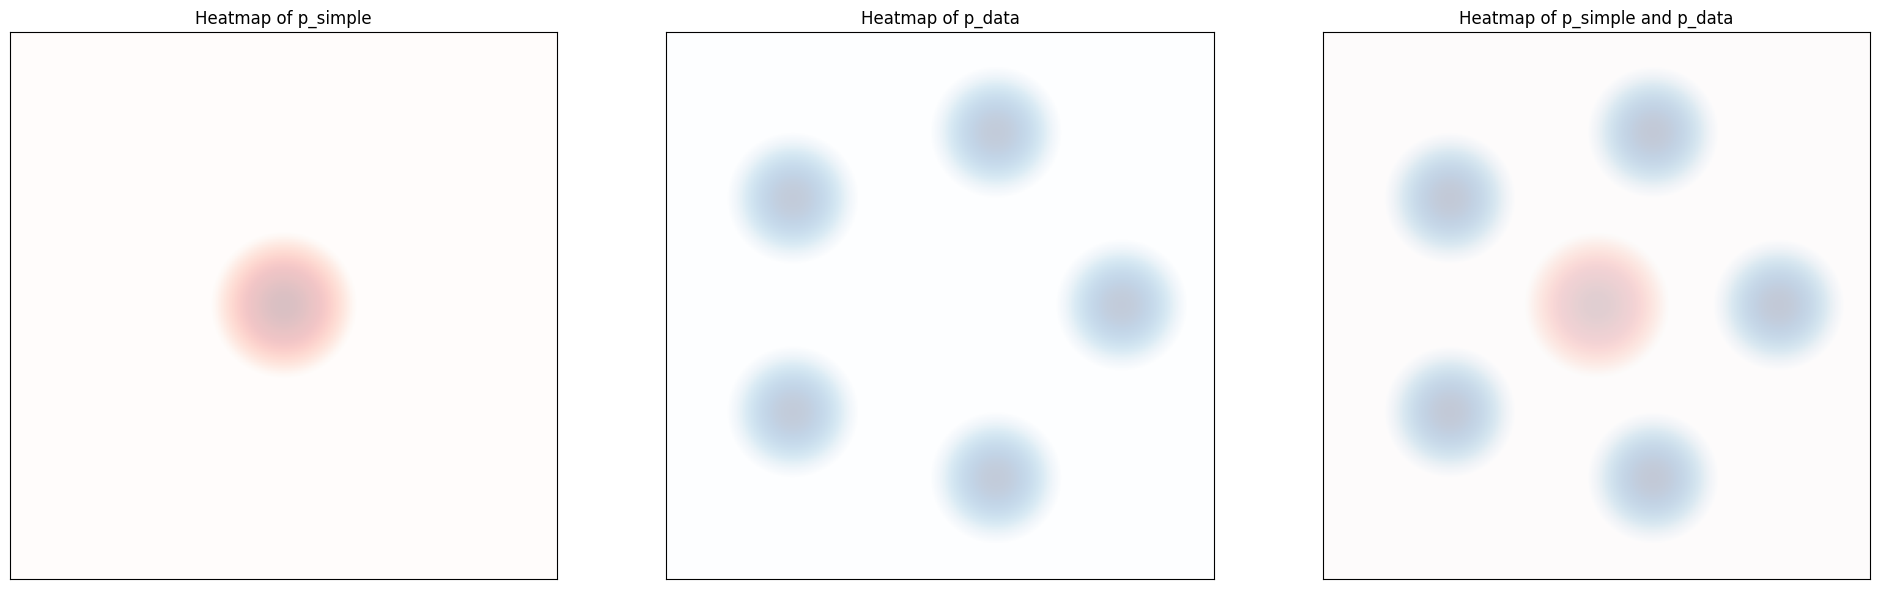

In [10]:
p_simple = Gaussian.isotropic(dim=2, std = 1.0).to(device)
p_data = GaussianMixture.symmetric_2D(nmodes=5, std=PARAMS["target_std"], scale=PARAMS["target_scale"]).to(device)

fig, axes = plt.subplots(1,3, figsize=(24,8))
bins = 200

scale = PARAMS["scale"]
x_bounds = [-scale,scale]
y_bounds = [-scale,scale]

axes[0].set_title('Heatmap of p_simple')
axes[0].set_xticks([])
axes[0].set_yticks([])
imshow_density(density=p_simple, x_bounds=x_bounds, y_bounds=y_bounds, bins=200, ax=axes[0], vmin=-10, alpha=0.25, cmap=plt.get_cmap('Reds'))


axes[1].set_title('Heatmap of p_data')
axes[1].set_xticks([])
axes[1].set_yticks([])
imshow_density(density=p_data, x_bounds=x_bounds, y_bounds=y_bounds, bins=200, ax=axes[1], vmin=-10, alpha=0.25, cmap=plt.get_cmap('Blues'))

axes[2].set_title('Heatmap of p_simple and p_data')
axes[2].set_xticks([])
axes[2].set_yticks([])
imshow_density(density=p_simple, x_bounds=x_bounds, y_bounds=y_bounds, bins=200, vmin=-10, alpha=0.25, cmap=plt.get_cmap('Reds'))
imshow_density(density=p_data, x_bounds=x_bounds, y_bounds=y_bounds, bins=200, vmin=-10, alpha=0.25, cmap=plt.get_cmap('Blues'))

# Implementing $\alpha_t$ and $\beta_t$

In [12]:
class Alpha(ABC):
    def __init__(self):
        # Check alpha_t(0) = 0
        assert torch.allclose(
            self(torch.zeros(1, 1)), torch.zeros(1, 1)
        )
        # Check alpha_1 = 1
        assert torch.allclose(
            self(torch.ones(1, 1)), torch.ones(1, 1)
        )

    @abstractmethod
    def __call__(self, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates alpha_t. Should satisfy: self(0.0) = 0.0, self(1.0) = 1.0.
        Args:
            - t: time (num_samples, 1)
        Returns:
            - alpha_t (num_samples, 1)
        """
        pass

    def dt(self, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates d/dt alpha_t.
        Args:
            - t: time (num_samples, 1)
        Returns:
            - d/dt alpha_t (num_samples, 1)
        """
        t = t.unsqueeze(1) # (num_samples, 1, 1)
        dt = vmap(jacrev(self))(t) # (num_samples, 1, 1, 1, 1)
        return dt.view(-1, 1)

class Beta(ABC):
    def __init__(self):
        # Check beta_0 = 1
        assert torch.allclose(
            self(torch.zeros(1, 1)), torch.ones(1, 1)
        )
        # Check beta_1 = 0
        assert torch.allclose(
            self(torch.ones(1, 1)), torch.zeros(1, 1)
        )

    @abstractmethod
    def __call__(self, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates alpha_t. Should satisfy: self(0.0) = 1.0, self(1.0) = 0.0.
        Args:
            - t: time (num_samples, 1)
        Returns:
            - beta_t (num_samples, 1)
        """
        pass

    def dt(self, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates d/dt beta_t.
        Args:
            - t: time (num_samples, 1)
        Returns:
            - d/dt beta_t (num_samples, 1)
        """
        t = t.unsqueeze(1) # (num_samples, 1, 1)
        dt = vmap(jacrev(self))(t) # (num_samples, 1, 1, 1, 1)
        return dt.view(-1, 1)

$$\alpha_t = t \quad \quad \text{and} \quad \quad \beta_t = \sqrt{1-t}.$$

In [13]:
class LinearAlpha(Alpha):
    """
    Implements alpha_t = t
    """

    def __call__(self, t: torch.Tensor) -> torch.Tensor:
        """
        Args:
            - t: time (num_samples, 1)
        Returns:
            - alpha_t (num_samples, 1)
        """
        return t

    def dt(self, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates d/dt alpha_t.
        Args:
            - t: time (num_samples, 1)
        Returns:
            - d/dt alpha_t (num_samples, 1)
        """
        return torch.ones_like(t)

class SquareRootBeta(Beta):
    """
    Implements beta_t = rt(1-t)
    """
    def __call__(self, t: torch.Tensor) -> torch.Tensor:
        """
        Args:
            - t: time (num_samples, 1)
        Returns:
            - beta_t (num_samples, 1)
        """
        return torch.sqrt(1 - t)

    def dt(self, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates d/dt alpha_t.
        Args:
            - t: time (num_samples, 1)
        Returns:
            - d/dt alpha_t (num_samples, 1)
        """
        return - 0.5 / (torch.sqrt(1 - t) + 1e-4)

implementing the `GaussianConditionalProbabilityPath` path

In [ ]:
class GaussianConditionalProbabilityPath(ConditionalProbabilityPath):
    def __init__(self, p_data: Sampleable, alpha: Alpha, beta: Beta):
        p_simple = Gaussian.isotropic(p_data.dim, 1.0)
        super().__init__(p_simple, p_data)
        self.alpha = alpha
        self.beta = beta

    def sample_conditioning_variable(self, num_samples: int) -> torch.Tensor:
        """
        Samples the conditioning variable z ~ p_data(x)
        Args:
            - num_samples: the number of samples
        Returns:
            - z: samples from p(z), (num_samples, dim)
        """
        return p_data.sample(num_samples)

    def sample_conditional_path(self, z: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Samples from the conditional distribution p_t(x|z) = N(alpha_t * z, beta_t**2 * I_d)
        Args:
            - z: conditioning variable (num_samples, dim)
            - t: time (num_samples, 1)
        Returns:
            - x: samples from p_t(x|z), (num_samples, dim)
        """
        return self.alpha(t) * z + self.beta(t) * torch.randn_like(z)

    def conditional_vector_field(self, x: torch.Tensor, z: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates the conditional vector field u_t(x|z)
        Note: Only defined on t in [0,1)
        Args:
            - x: position variable (num_samples, dim)
            - z: conditioning variable (num_samples, dim)
            - t: time (num_samples, 1)
        Returns:
            - conditional_vector_field: conditional vector field (num_samples, dim)
        """
        alpha_t = self.alpha(t)
        beta_t = self.beta(t)
        dt_alpha_t = self.alpha.dt(t)
        dt_beta_t = self.beta.dt(t)

        return (dt_alpha_t - dt_beta_t / beta_t * alpha_t) * z + dt_beta_t / beta_t * x

    def conditional_score(self, x: torch.Tensor, z: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Evaluates the conditional score of p_t(x|z) = N(alpha_t * z, beta_t**2 * I_d)
        Note: Only defined on t in [0,1)
        Args:
            - x: position variable (num_samples, dim)
            - z: conditioning variable (num_samples, dim)
            - t: time (num_samples, 1)
        Returns:
            - conditional_score: conditional score (num_samples, dim)
        """
        raise NotImplementedError("Fill me in for Question 2.4!")